# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [64]:
import pandas as pd
import numpy as np

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [66]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

##### 1. If over 50% of the values of a column, the column should be removed from the data frame

In [67]:
data.isnull().sum()

ApplicationDate                   0
Age                             100
AnnualIncome                      0
CreditScore                       0
EmploymentStatus                  0
EducationLevel                    0
Experience                        0
LoanAmount                        0
LoanDuration                      0
MaritalStatus                   100
NumberOfDependents                0
HomeOwnershipStatus               0
MonthlyDebtPayments               0
CreditCardUtilizationRate         0
NumberOfOpenCreditLines           0
NumberOfCreditInquiries           0
DebtToIncomeRatio                 0
BankruptcyHistory                 0
LoanPurpose                       0
PreviousLoanDefaults              0
PaymentHistory                    0
LengthOfCreditHistory             0
SavingsAccountBalance             0
CheckingAccountBalance            0
TotalAssets                       0
TotalLiabilities                  0
MonthlyIncome                     0
UtilityBillsPaymentHistory  

In [68]:
# Find which column has over 50% missing values of the values of its column
for i in [data['Age'], data['MaritalStatus'], data['RiskScore']]:
    if i.isnull().sum()/len(i) > 0.5:
        print(i)

0         NaN
1        52.0
2         NaN
3         NaN
4         NaN
         ... 
19995     NaN
19996     NaN
19997     NaN
19998     NaN
19999     NaN
Name: RiskScore, Length: 20000, dtype: float64


In [69]:
# That column is RiskScore, so we drop it
data.drop(columns=['RiskScore'], inplace=True)

##### 2. For a categorical column, if a row contains a missing value, you need to delete the whole row

In [70]:
cate_cols = data.select_dtypes(include=['object']).columns  # Get categorical columns
data = data.dropna(subset = cate_cols)

##### 3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column

In [71]:
numer_cols = data.select_dtypes(include=[np.number]).columns  # Get numerical columns
for k in numer_cols:
    data[k].fillna(data[k].mean(), inplace=True)

/var/folders/k6/yqw03rd164v90p9wmw2y2yrm0000gn/T/ipykernel_34166/3484976188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[k].fillna(data[k].mean(), inplace=True)


### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

##### 1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.

In [72]:
for i in cate_cols:
    if data[i].nunique() == len(data[i]):
        data.drop(columns = [i], inplace = True)

In [73]:
print(data.select_dtypes(include=['object']).columns) # Print to see how many categorical columns left

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


In [74]:
data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45.0,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,38.0,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,58.0,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,37.0,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


##### 2. Use one hot encoding to convert the categorical values into numerical ones.

In [75]:
#import the package 
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [76]:
# Categorical columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

# One-hot encoding for 'EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose' columns
data = pd.get_dummies(data, columns=['EmploymentStatus'], drop_first=True)
data = pd.get_dummies(data, columns=['MaritalStatus'], drop_first=True)
data = pd.get_dummies(data, columns=['HomeOwnershipStatus'], drop_first=True)
data = pd.get_dummies(data, columns=['LoanPurpose'], drop_first=True)

# Ordinal Encoding for 'EducationLevel' column
data['EducationLevel'] = ord_enc.fit_transform(data[['EducationLevel']])

In [77]:
data.head()

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45.0,39948,617,4.0,22,13152,48,2,183,0.354418,...,True,False,False,False,True,False,False,False,True,False
1,38.0,39709,628,0.0,15,26045,48,1,496,0.087827,...,False,True,False,False,False,False,True,False,False,False
2,47.0,40724,570,1.0,26,17627,36,2,902,0.137414,...,True,False,False,False,False,True,False,True,False,False
3,58.0,69084,545,3.0,34,37898,96,1,755,0.267587,...,False,True,False,False,False,False,False,False,True,False
4,37.0,103264,594,0.0,17,9184,36,1,274,0.320535,...,True,False,False,False,False,False,True,False,False,False


## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.pylab as plt

In [79]:
# Initialize
y = data['LoanApproved']
X = data.drop(columns=['LoanApproved'])

In [80]:
# Split the dataset into 80% training and 20% testing
ran_state_val = 47686456
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=ran_state_val)

In [81]:
print('The shape of training set: ', X_train.shape)
print('The shape of testing set: ', X_test.shape)

The shape of training set:  (15920, 41)
The shape of testing set:  (3980, 41)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

##### 1. Train a logistic regression model

In [82]:
log = LogisticRegression
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)  # This fits the scaler and scales X_train

# Use the already-fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)  # This transforms X_test based on X_train's scaling

In [83]:
# Train logistic regression model
model = log(max_iter=10000, random_state=ran_state_val)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

##### 2. Report two classification performance metrics (accuracy and f1-score) on the testing data

In [84]:
# Evaluate the model
# Accuracy and F1 score for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation results
print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1 Score: {test_f1}")

Testing Accuracy: 0.957286432160804
Testing F1 Score: 0.9573475413751585


##### 3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [85]:
# Accuracy and F1 score for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Training F1 Score: {train_f1}")

# Compare
print('Comparison: Training Accuracy = ', train_accuracy, 'Testing Accuracy = ', test_accuracy)
print('Comparison: Training F1-Score = ', train_f1, 'Testing F1-Score = ', test_f1)

Training Accuracy: 0.9544597989949749
Training F1 Score: 0.9542894778940952
Comparison: Training Accuracy =  0.9544597989949749 Testing Accuracy =  0.957286432160804
Comparison: Training F1-Score =  0.9542894778940952 Testing F1-Score =  0.9573475413751585


In [86]:
# Justification
if train_accuracy > test_accuracy and train_f1 > test_f1 and (train_accuracy - test_accuracy) > 0.05:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

The model is not overfitting.


### Justification:

Because the metrics on training data are higher than the metrics on testing data, and the difference between training accuracy and testing accuracy is not more than 5%, so we can say that the model is not overfitting.

Now, we can create confusion matrixes to see the results:

<Figure size 800x600 with 0 Axes>

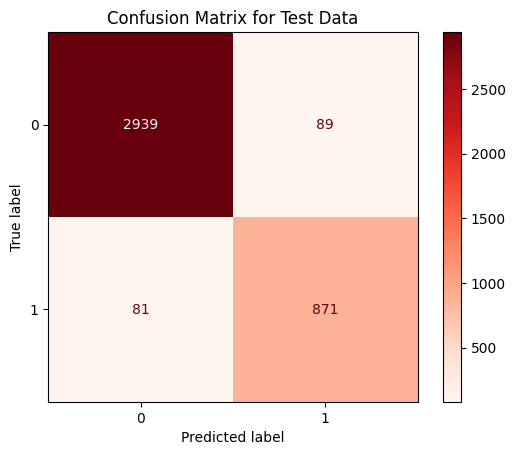

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Correct: Use y_test (true labels) and y_test_pred (predicted labels)
con_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=['0', '1'])

# Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Test Data')
plt.show()

<Figure size 800x600 with 0 Axes>

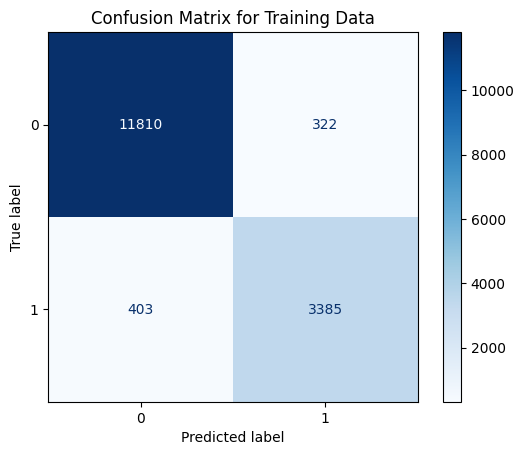

In [88]:
# Confusion Matrix for Training Data
con_matrix_train = confusion_matrix(y_train, y_train_pred)

disp_train = ConfusionMatrixDisplay(confusion_matrix=con_matrix_train, display_labels=['0', '1'])
plt.figure(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

##### 1. Visualise the change of the two performance metrics with respect to the number of eliminated features using a line chart.

In [89]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [109]:
# Use RFE to select the top 15 features
rfe = RFE(estimator=model, n_features_to_select=15, step=5)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=10000, random_state=47686456),
    n_features_to_select=15, step=5)

In [110]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
AnnualIncome selected=False rank=3
CreditScore selected=True rank=1
EducationLevel selected=False rank=3
Experience selected=True rank=1
LoanAmount selected=True rank=1
LoanDuration selected=False rank=3
NumberOfDependents selected=False rank=5
MonthlyDebtPayments selected=False rank=7
CreditCardUtilizationRate selected=False rank=4
NumberOfOpenCreditLines selected=False rank=4
NumberOfCreditInquiries selected=False rank=6
DebtToIncomeRatio selected=False rank=7
BankruptcyHistory selected=True rank=1
PreviousLoanDefaults selected=True rank=1
PaymentHistory selected=True rank=1
LengthOfCreditHistory selected=True rank=1
SavingsAccountBalance selected=False rank=5
CheckingAccountBalance selected=False rank=5
TotalAssets selected=False rank=3
TotalLiabilities selected=False rank=6
MonthlyIncome selected=True rank=1
UtilityBillsPaymentHistory selected=False rank=5
JobTenure selected=False rank=7
NetWorth selected=True rank=1
BaseInterestRate selected=False rank=2
I

In [111]:
# Predictions
y_pred = rfe.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy}")

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

Model accuracy with selected features: 0.9547738693467337
Selected features: Index(['Age', 'CreditScore', 'Experience', 'LoanAmount', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio',
       'EmploymentStatus_Unemployed', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Rent'],
      dtype='object')


In [93]:
# Store performance metrics
accuracy_scores = []
f1_scores = []
n_feat_retained = []

for n_features_to_select in range(1, X_train_scaled.shape[1] + 1, 5):  # Test eliminating features in steps of 5
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=5)
    rfe.fit(X_train_scaled, y_train)
    
    # Predict on the testing data
    Y_test_pred = rfe.predict(X_test_scaled)
    
    # Compute accuracy and F1 score
    accuracy = accuracy_score(y_test, Y_test_pred)
    f1 = f1_score(y_test, Y_test_pred)
    
    # Store the number of retained features and performance metrics
    n_feat_retained.append(n_features_to_select)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

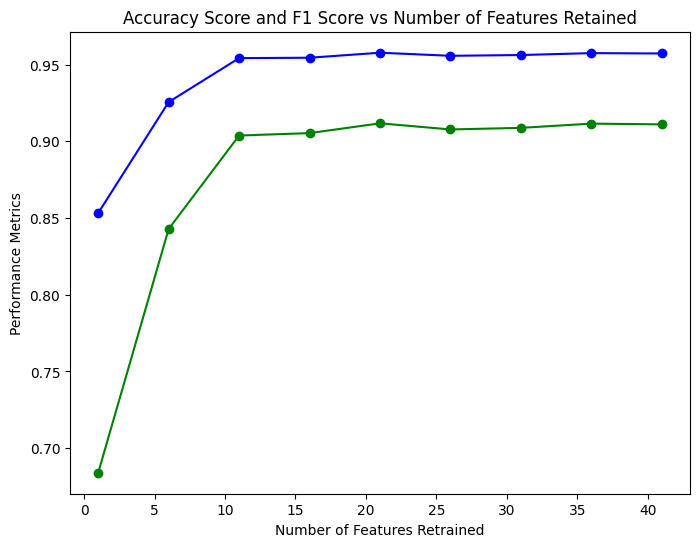

In [94]:
# Visualize
plt.figure(figsize=(8, 6))
plt.plot(n_feat_retained, accuracy_scores, label='Accuracy Score', marker='o', color='b')
plt.plot(n_feat_retained, f1_scores, label='F1 Score', marker='o', color='g')
plt.xlabel('Number of Features Retrained')
plt.ylabel('Performance Metrics')
plt.title('Accuracy Score and F1 Score vs Number of Features Retained')
plt.show()

##### 2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

##### The point where the F1-score spikes and the accuracy is stable is the 10th point. So, the optimal number of features will be 10.

In [95]:
optimal_feat = 10 

# Re-run RFE with the chosen number of features
rfe = RFE(estimator=model, n_features_to_select=optimal_feat, step=5)
rfe.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rfe.predict(X_test_scaled)

# Evaluate model performance with the selected features
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model accuracy with {optimal_feat} features: {accuracy}")
print(f"Model F1 score with {optimal_feat} features: {f1}")

# Get the selected features
selected_feat = X.columns[rfe.support_]
print(f"Selected features: {selected_feat}")


Model accuracy with 10 features: 0.9552763819095478
Model F1 score with 10 features: 0.9551623147159312
Selected features: Index(['CreditScore', 'LoanAmount', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'MonthlyIncome',
       'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio',
       'EmploymentStatus_Unemployed'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

##### 1. Slect the features identifed in Step 2.3 for this task

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# Get the column indices corresponding to the selected features
selected_feat_indices = [X_train.columns.get_loc(feature) for feature in selected_feat]

# Use the indices to select the corresponding columns from the scaled arrays
X_train_selected = X_train_scaled[:, selected_feat_indices]
X_test_selected = X_test_scaled[:, selected_feat_indices]

##### 2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data

In [98]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_selected, y_train)

# Predict training and testing data
y_train_pred = knn.predict(X_train_selected)
y_test_pred = knn.predict(X_test_selected)

# Calculate and print
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1 Score: {test_f1}")

Testing Accuracy: 0.9133165829145728
Testing F1 Score: 0.9132066903183286


##### 3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [112]:
print("Training Accuracy:", train_accuracy)
print("Training F1-Score:", train_f1)

# Compare
print('Comparison: Training Accuracy = ', train_accuracy, 'Testing Accuracy = ', test_accuracy)
print('Comparison: Training F1-Score = ', train_f1, 'Testing F1-Score = ', test_f1)

# Justify whether the model is overfitting
if train_accuracy > test_accuracy and train_f1 > test_f1:
    print("The model may be overfitting, as the performance on the training data is better than on the testing data.")
else:
    print("The model is not overfitting, as the performance on both the training and testing data is similar.")

Training Accuracy: 1.0
Training F1-Score: 1.0
Comparison: Training Accuracy =  1.0 Testing Accuracy =  0.9346733668341709
Comparison: Training F1-Score =  1.0 Testing F1-Score =  0.9334487320892759
The model may be overfitting, as the performance on the training data is better than on the testing data.


### Justification:

Because the metrics on training data are higher than the metrics on testing data, especially training accuracy = 1 and training F1-score = 1, the model may be overfitting (the performance on the training data is better than on the testing data)

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [101]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid (to avoid long runtimes)
param_grid = {'n_neighbors': list(range(1, 11))}

# Perform grid search with 5-fold cross validation and parallel processing
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get the best K value and the best accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best K: {best_k}")
print(f"Best Accuracy during cross-validation: {best_accuracy:.4f}")

# Re-train using the best K found from the grid search
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_selected, y_train)

# Predict on the testing data
y_test_pred = knn_best.predict(X_test_selected)

# Calculate test accuracy and F1-score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy with best K: {test_accuracy:.4f}")
print(f"Test F1 Score with best K: {test_f1:.4f}")

# Optional: Check shapes of training and testing data
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")
print(f"y_test shape: {y_test.shape}")


Best K: 9
Best Accuracy during cross-validation: 0.9282
Test Accuracy with best K: 0.9347
Test F1 Score with best K: 0.9334
X_train_selected shape: (15920, 10)
y_train shape: (15920,)
X_test_selected shape: (3980, 10)
y_test shape: (3980,)


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

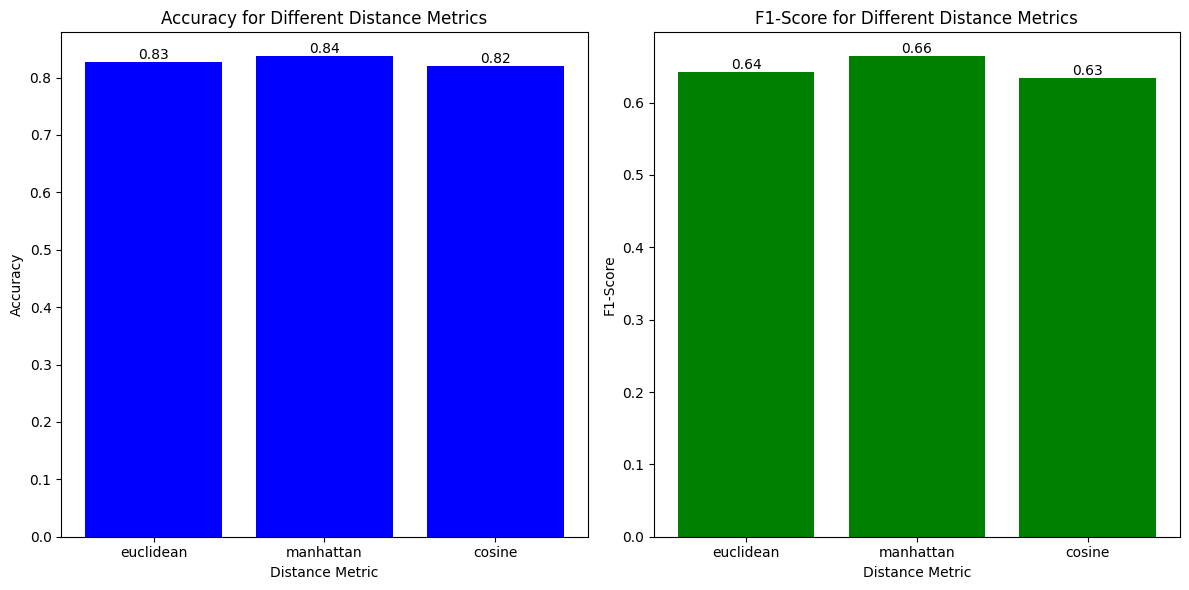

Best accuracy metric: manhattan
Best F1-score metric: manhattan
Worst accuracy metric: cosine
Worst F1-score metric: cosine


In [116]:
# 'l1' = 'manhattan'
# Train 1-NN classifiers 
distance_metrics = ['euclidean', 'manhattan', 'cosine']
accuracy_scores = []
f1_scores = []

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=1, metric=metric)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the results
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Visualize the results 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

b1 = ax[0].bar(distance_metrics, accuracy_scores, color='blue')
ax[0].set_title('Accuracy for Different Distance Metrics')
ax[0].set_xlabel('Distance Metric')
ax[0].set_ylabel('Accuracy')

# Annotate accuracy scores
for bar in b1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

b2 = ax[1].bar(distance_metrics, f1_scores, color='green')
ax[1].set_title('F1-Score for Different Distance Metrics')
ax[1].set_xlabel('Distance Metric')
ax[1].set_ylabel('F1-Score')

# Annotate F1-scores
for bar in b2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Report the best and worst performance
best_accuracy_metric = distance_metrics[accuracy_scores.index(max(accuracy_scores))]
best_f1_metric = distance_metrics[f1_scores.index(max(f1_scores))]
worst_accuracy_metric = distance_metrics[accuracy_scores.index(min(accuracy_scores))]
worst_f1_metric = distance_metrics[f1_scores.index(min(f1_scores))]

print(f"Best accuracy metric: {best_accuracy_metric}")
print(f"Best F1-score metric: {best_f1_metric}")
print(f"Worst accuracy metric: {worst_accuracy_metric}")
print(f"Worst F1-score metric: {worst_f1_metric}")

### Report:

AS we can see from the graphs, manhattan distance performed best as it captures important magnitude differences between features, which suits my data. Cosine similarity, focusing only on the angle between vectors, performed worst because it ignores magnitude, which is key in my dataset.